In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
#Create the dataframe from de CSV file
df=pd.read_csv('pylidc_csv.csv')

In [3]:
#In this first section we present some information on the data

In [4]:
df.head(5)

,Unnamed: 0,Nod_id,Patient_id,slice thickness,N nods,Spiculation_Min,Spiculation_Med,Spiculation_Max,Internal_Structure,Calcification,...,Lobulation_max,Texture,Malignancy_min,Malignancy_mean,Malignancy_max,Malignancy_n4,Malignancy_n5,Subtlety_Min,Subtlety_Med,Subtlety_Max
0,1,LIDC-IDRI-0078-1,LIDC-IDRI-0078,3.0,4,1,2.25,4,1,6,...,4,5,3,3.75,5,1,1,4.0,4.50,5.0
1,2,LIDC-IDRI-0078-2,LIDC-IDRI-0078,3.0,4,1,2.25,4,1,6,...,4,4,3,3.75,5,1,1,4.0,4.75,5.0
2,3,LIDC-IDRI-0078-3,LIDC-IDRI-0078,3.0,4,1,1.00,1,1,5,...,1,5,1,1.00,1,0,0,4.0,4.00,4.0
3,4,LIDC-IDRI-0078-4,LIDC-IDRI-0078,3.0,4,1,2.75,4,1,4,...,4,5,3,4.25,5,1,2,5.0,5.00,5.0
4,5,LIDC-IDRI-0069-1,LIDC-IDRI-0069,2.0,3,1,4.00,5,1,6,...,5,5,2,3.25,5,0,1,2.0,2.50,3.0


In [5]:
#The number of nods for each patient is distrubuted according to the following frequency table 
sum=0
print("Number of nods ", "Relative frequency")
for j in range(1,10):
    sum+=df['N nods'].value_counts()[j]/len(df)
    print("       ",j, "         " ,(df['N nods'].value_counts()[j]/len(df)).round(2))
print("   Total:          ",sum.round(2))

Number of nods  Relative frequency
        1           0.11
        2           0.16
        3           0.14
        4           0.11
        5           0.09
        6           0.09
        7           0.06
        8           0.07
        9           0.03
   Total:           0.87


In [6]:
print('Number of patients')
print(df["Patient_id"].nunique())

Number of patients
875


In [7]:
#To better understand the way to classify a nod to be malignant or not we present the related variables 

AxesSubplot(0.125,0.125;0.775x0.755)


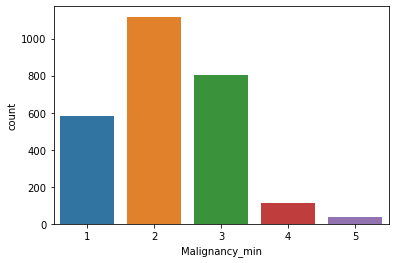

In [8]:
print(sns.countplot(x='Malignancy_min',data=df))

AxesSubplot(0.125,0.125;0.775x0.755)


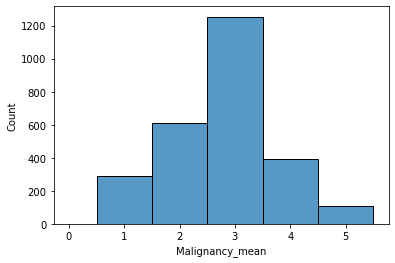

In [9]:
print(sns.histplot(x='Malignancy_mean',data=df,bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


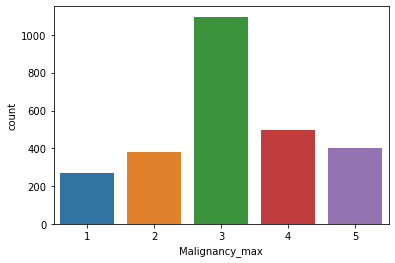

In [10]:
print(sns.countplot(x='Malignancy_max',data=df))

AxesSubplot(0.125,0.125;0.775x0.755)


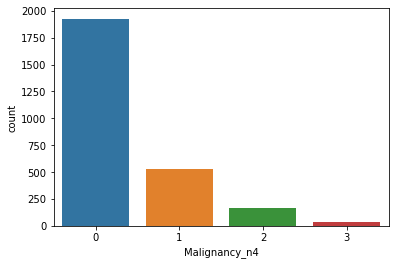

In [11]:
print(sns.countplot(x='Malignancy_n4',data=df))

AxesSubplot(0.125,0.125;0.775x0.755)


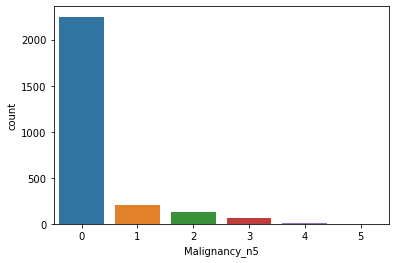

In [12]:
print(sns.countplot(x='Malignancy_n5',data=df))

In [13]:
#Noticing that the distribution of the mean value and the max value is similar we explored it a litle further 
df['dif']=df['Malignancy_max']-df['Malignancy_mean']

AxesSubplot(0.125,0.125;0.775x0.755)


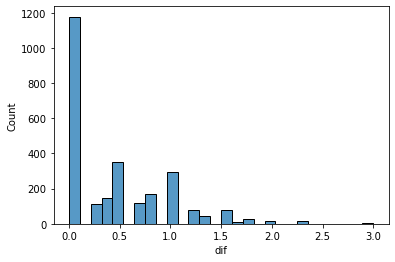

In [14]:
print(sns.histplot(x='dif',data=df))

In [15]:
# Despite the similarities between the mean and the max value we decided to create a joint criterion for the 
# malignancy classification. Therefore a node is considered malignant if there is at least one classification of 5 or
# if the mean value over the classifications is at least 3.5

df["Malignancy"]=np.where((df['Malignancy_mean']>= 3.5)|(df['Malignancy_max']==5), True, False)

In [16]:
df[{'Malignancy_mean','Malignancy_max','Malignancy'}].head(5)

,Malignancy_mean,Malignancy,Malignancy_max
0,3.75,True,5
1,3.75,True,5
2,1.00,False,1
3,4.25,True,5
4,3.25,True,5


In [17]:
# Identify the features used to predict the classification of the malignancy of the node
# X - vector of valiables used to predict
# y - target variable

X=df[['N nods','Spiculation_Min', 'Spiculation_Med', 'Spiculation_Max',
       'Internal_Structure', 'Calcification', 'Sphericity', 'Margin_min',
       'Margin_mean', 'Margin_max', 'Lobulation_min', 'Lobulation_mean',
       'Lobulation_max', 'Texture']]
y=df['Malignancy']

In [18]:
# Devide the dataset in train (80%) and test (20%) subsets
# Define a random state do fix this division

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
# Construction of a decision tree classifier with the stop criterion of 
# at least 0.001 of minimum impurity decrease to avoind overfitting

dt = tree.DecisionTreeClassifier(min_impurity_decrease=0.001)
dt = dt.fit(X_train, y_train)
df['Prediction_dt']=dt.predict(X)

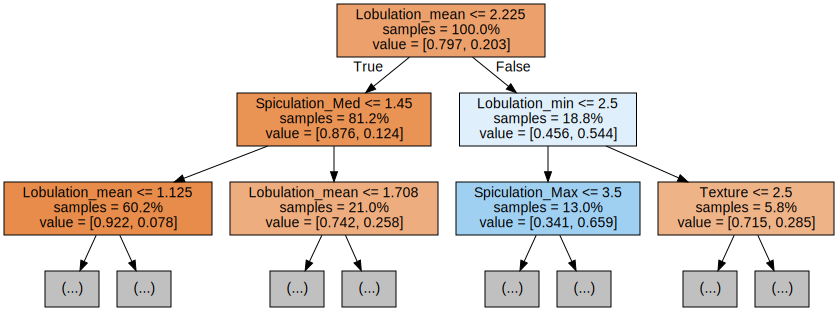

In [20]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation

dt_data = export_graphviz(dt,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
graph = graphviz.Source(dt_data)
display(graph)

In [21]:
# test of the decision tree obtained using the test subset
y_predict=dt.predict(X_test)

print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[390,  18],
       [ 78,  45]])

In [22]:
print("Accuracy:")
accuracy_score(y_test, y_predict)

Accuracy:


0.8192090395480226

In [23]:
# Random Forest construction with trees similar to the ones obtained previously
# for different values of hyperparameter - number of features (max_features) 

rf = RandomForestClassifier(max_features=1,min_impurity_decrease=0.001)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Number of featrures: ", 1 ," Accuracy: ", accuracy)
best=1
best_ac=accuracy
x_rf=[1]
y_rf=[accuracy]
    
for i in range(2,10):
    rf = RandomForestClassifier(max_features=i,min_impurity_decrease=0.001,n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Number of featrures: ", i ," Accuracy: ", accuracy)
    x_rf.append(i)
    y_rf.append(accuracy)
    if(accuracy>best_ac):
        best=i
        best_ac=accuracy

#print("Number of featrures: ", best ," Accuracy: ", best_ac)

Best number of features:  7  with accuracy= 0.8531073446327684


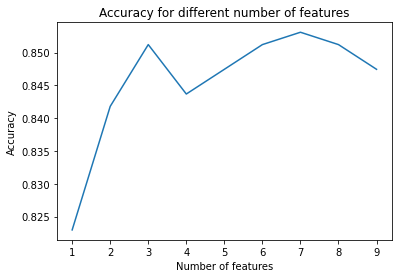

In [24]:
# Evaluate the hyperparameter and identify the best value for the accuracy

s = pd.Series(y_rf,x_rf)
plt.title('Accuracy for different number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')

s.plot.line()  
print("Best number of features: ", best ," with accuracy=", best_ac)

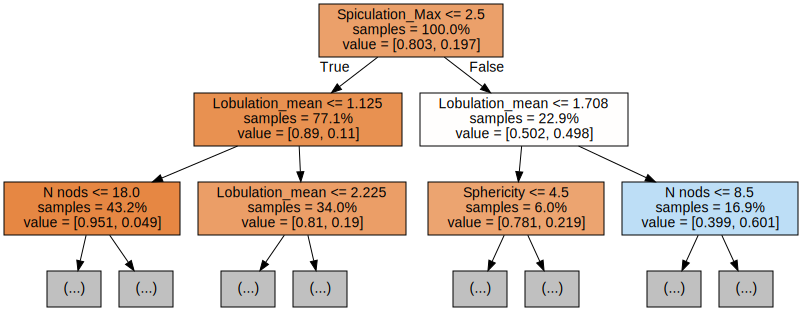

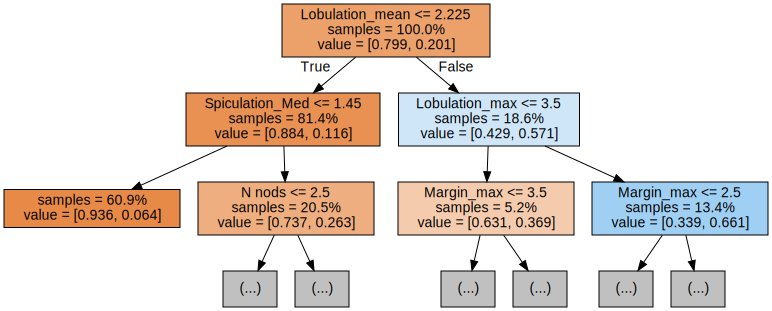

In [25]:
# print of the more significant separations with percentage of the subset (train) and proportion for each separation
# for the two first trees

rf = RandomForestClassifier(max_features=best,min_impurity_decrease=0.001)
rf.fit(X_train, y_train)
df['Prediction_rf']=rf.predict(X)

for i in range(2):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [26]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8493408662900188


In [27]:
#KNN

In [28]:
# Knn construction for different values of hyperparameter - number of neighbors (n_neighbors) 


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print("Number of neighbors: ","1", "Accuracy: ", accuracy)
best=1
best_ac=accuracy
x_knn=[1]
y_knn=[accuracy]

for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Number of neighbors: ",i, "Accuracy: ", accuracy)
    x_knn.append(i)
    y_knn.append(accuracy)
    if(accuracy>best_ac):
        best=i
        best_ac=accuracy

Best number of neighbors:  8  with accuracy= 0.8418079096045198


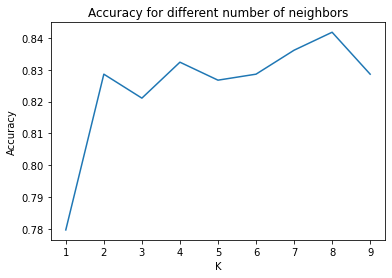

In [29]:
# Evaluate the hyperparameter and identify the best value for the accuracy

s = pd.Series(y_knn,x_knn)
plt.title('Accuracy for different number of neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy')

s.plot.line()  
print("Best number of neighbors: ", best ," with accuracy=", best_ac)

In [30]:
# Explore the results of the clustering 
knn = KNeighborsClassifier(n_neighbors=best)
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=8)

In [31]:
df['Prediction_knn']=knn.predict(X)

In [32]:
# We decided to analyze and compare the behaviour of the differente variables and its relation with
# the prediction of the random forest model (this is the model with the best accuracy) and Malignancy

AxesSubplot(0.125,0.125;0.775x0.755)


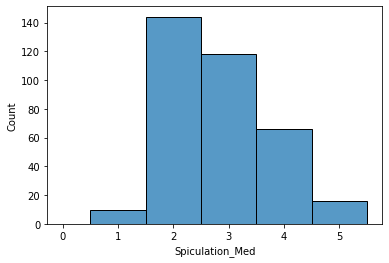

In [33]:
print(sns.histplot(x='Spiculation_Med',data=df[df["Prediction_rf"]==True],bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


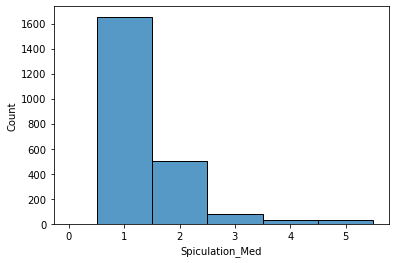

In [34]:
print(sns.histplot(x='Spiculation_Med',data=df[df["Prediction_rf"]==False],bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


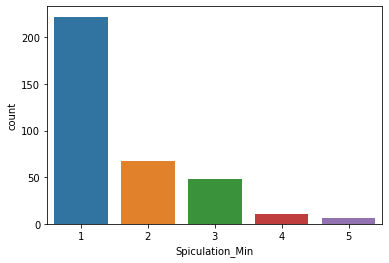

In [35]:
print(sns.countplot(x='Spiculation_Min',data=df[df["Prediction_rf"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


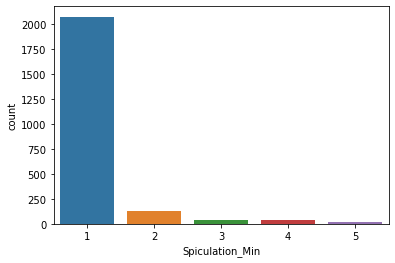

In [36]:
print(sns.countplot(x='Spiculation_Min',data=df[df["Prediction_rf"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


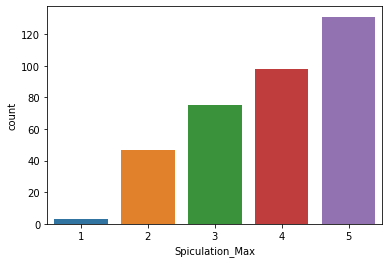

In [37]:
print(sns.countplot(x='Spiculation_Max',data=df[df["Prediction_rf"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


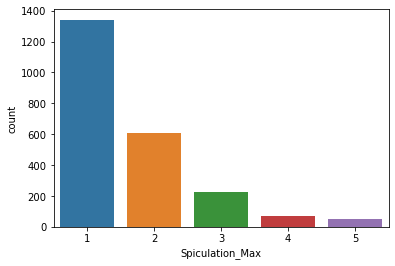

In [38]:
print(sns.countplot(x='Spiculation_Max',data=df[df["Prediction_rf"]==False]))

In [39]:
# Regarding the Spiculation and its relation with the prediction of malignancy, the variable that best distinguish 
# the classes is its max value. 
# In the following plots we can see that the separation between classes of malignancy is less evident.

AxesSubplot(0.125,0.125;0.775x0.755)


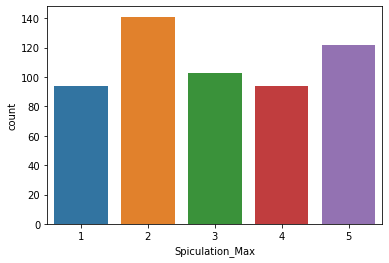

In [40]:
print(sns.countplot(x='Spiculation_Max',data=df[df["Malignancy"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


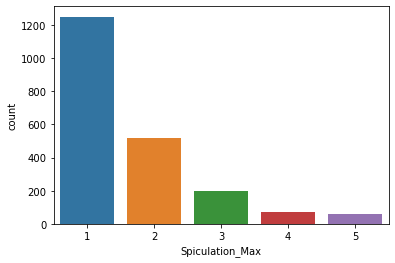

In [41]:
print(sns.countplot(x='Spiculation_Max',data=df[df["Malignancy"]==False]))

In [42]:
# The information on the Internal_Structure variable has little value since 
# almost all elements have the same classification
df['Internal_Structure'].value_counts()

1    2644
4       4
2       3
Name: Internal_Structure, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


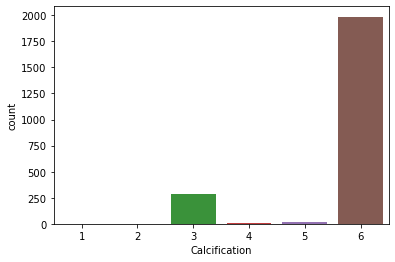

In [43]:
# Regarding Calcification the distributions obtained for the predictions and the real value of malignancy 
# are very similar

print(sns.countplot(x='Calcification',data=df[df["Prediction_rf"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


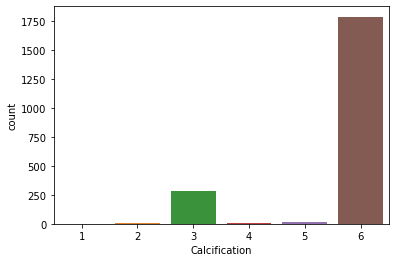

In [44]:
print(sns.countplot(x='Calcification',data=df[df["Malignancy"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


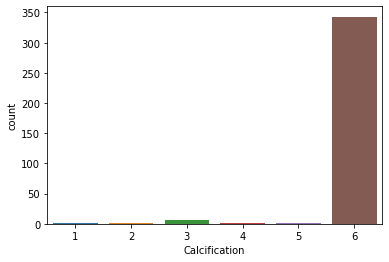

In [45]:
print(sns.countplot(x='Calcification',data=df[df["Prediction_rf"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


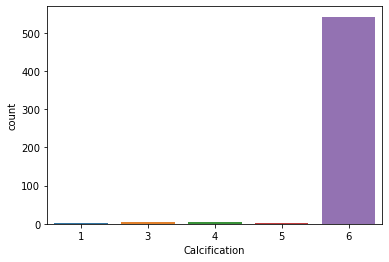

In [46]:
print(sns.countplot(x='Calcification',data=df[df["Malignancy"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


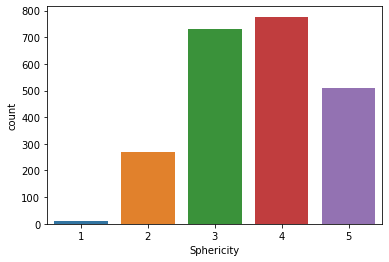

In [47]:
# Regarding Sphericity the distributions obtained for the predictions and the real value of malignancy 
# are very similar. Nevertheless it seams that it brings little information on the classification of the node.

print(sns.countplot(x='Sphericity',data=df[df["Prediction_rf"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


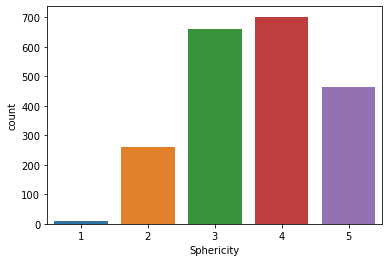

In [48]:
print(sns.countplot(x='Sphericity',data=df[df["Malignancy"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


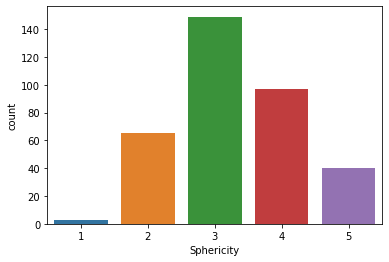

In [49]:
print(sns.countplot(x='Sphericity',data=df[df["Prediction_rf"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


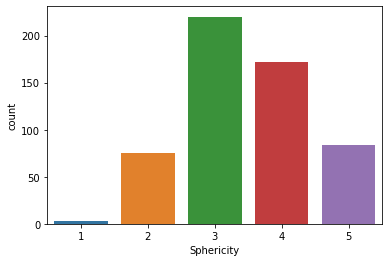

In [50]:
print(sns.countplot(x='Sphericity',data=df[df["Malignancy"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


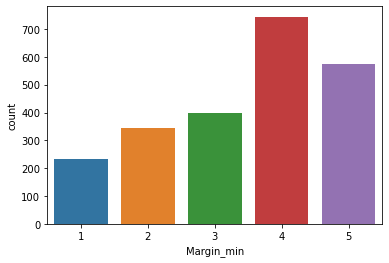

In [51]:
# Regarding Margin_min the distributions obtained for the predictions and the real value of malignancy 
# are very similar and it seams that it might be interesting to be considered in the classification process

print(sns.countplot(x='Margin_min',data=df[df["Prediction_rf"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


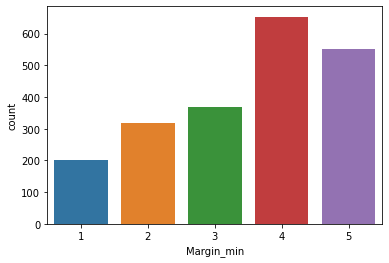

In [52]:
print(sns.countplot(x='Margin_min',data=df[df["Malignancy"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


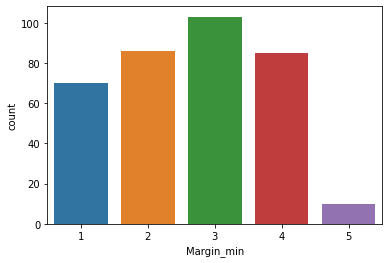

In [53]:
print(sns.countplot(x='Margin_min',data=df[df["Prediction_rf"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


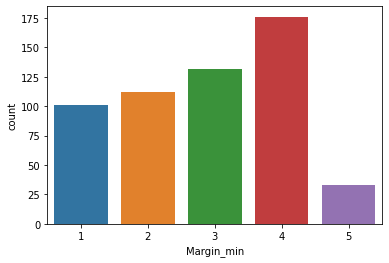

In [54]:
print(sns.countplot(x='Margin_min',data=df[df["Malignancy"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


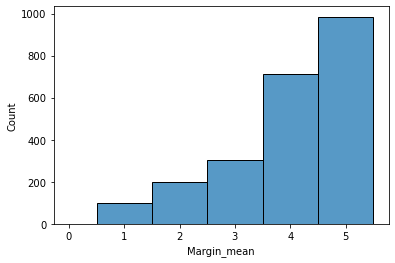

In [55]:
# Regarding Margin_mean the distributions obtained for the predictions and the real value of malignancy are
# very similar and it seams that it might be less interesting than the minimum value to the classification process


print(sns.histplot(x='Margin_mean',data=df[df["Prediction_rf"]==False],bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


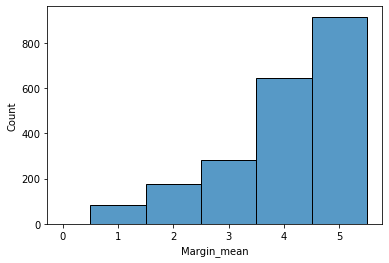

In [56]:
print(sns.histplot(x='Margin_mean',data=df[df["Malignancy"]==False],bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


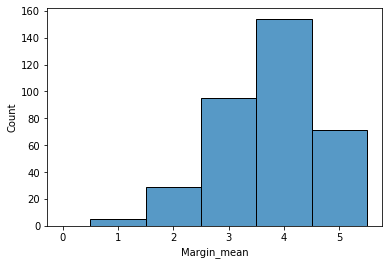

In [57]:
print(sns.histplot(x='Margin_mean',data=df[df["Prediction_rf"]==True],bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


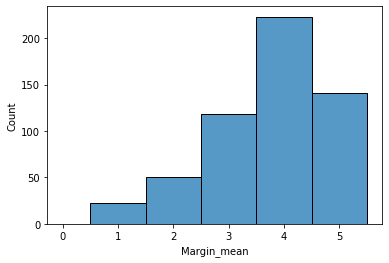

In [58]:
print(sns.histplot(x='Margin_mean',data=df[df["Malignancy"]==True],bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


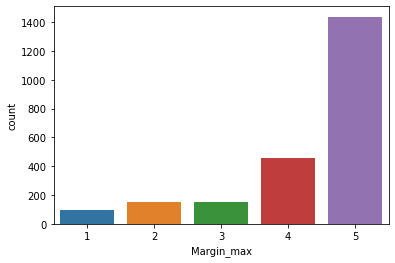

In [59]:
# Regarding Margin_max the distributions obtained for the predictions and the real value of malignancy are very 
# similar and it it seams that it might be less interesting than the minimum value to the classification process

print(sns.countplot(x='Margin_max',data=df[df["Prediction_rf"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


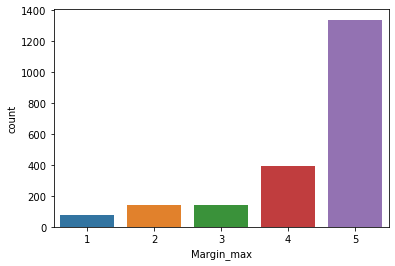

In [60]:
print(sns.countplot(x='Margin_max',data=df[df["Malignancy"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


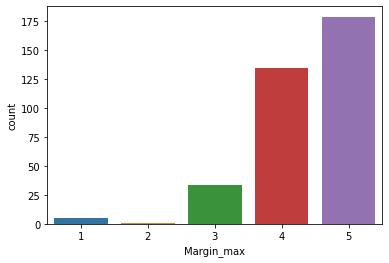

In [61]:
print(sns.countplot(x='Margin_max',data=df[df["Prediction_rf"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


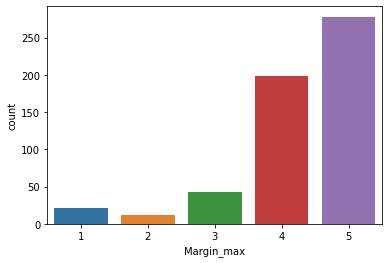

In [62]:
print(sns.countplot(x='Margin_max',data=df[df["Malignancy"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


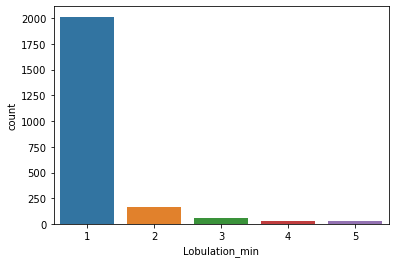

In [63]:
# Regarding Lobulation_min the distributions obtained for the predictions and the real value of malignancy 
# are very similar and it seams that it might be interesting to be considered in the classification process

print(sns.countplot(x='Lobulation_min',data=df[df["Prediction_rf"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


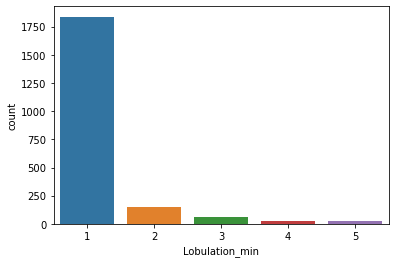

In [64]:
print(sns.countplot(x='Lobulation_min',data=df[df["Malignancy"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


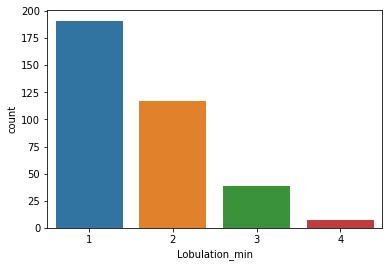

In [65]:
print(sns.countplot(x='Lobulation_min',data=df[df["Prediction_rf"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


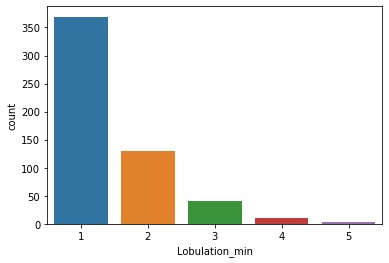

In [66]:
print(sns.countplot(x='Lobulation_min',data=df[df["Malignancy"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


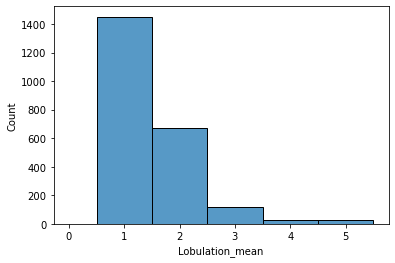

In [67]:
# Regarding Lobulation_mean the distributions obtained for the predictions and the real value of malignancy are
# very similar and it seams that it also might be interesting to the classification process


print(sns.histplot(x='Lobulation_mean',data=df[df["Prediction_rf"]==False],bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


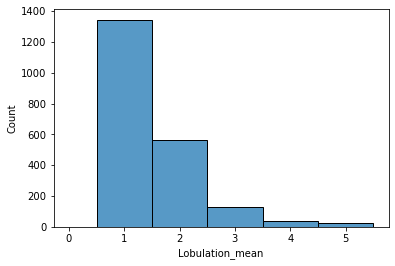

In [68]:
print(sns.histplot(x='Lobulation_mean',data=df[df["Malignancy"]==False],bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


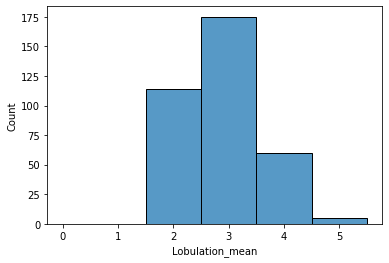

In [69]:
print(sns.histplot(x='Lobulation_mean',data=df[df["Prediction_rf"]==True],bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


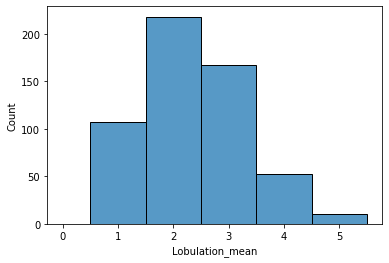

In [70]:
print(sns.histplot(x='Lobulation_mean',data=df[df["Malignancy"]==True],bins=[0,0.5,1.5,2.5,3.5,4.5,5.5]))

AxesSubplot(0.125,0.125;0.775x0.755)


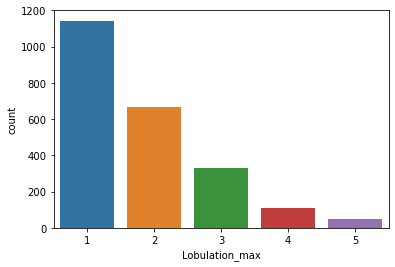

In [71]:
# Regarding Lobulation_max the distributions obtained for the predictions and the real value of malignancy 
# are similar and it seams that it might be interesting to be considered in the classification process

print(sns.countplot(x='Lobulation_max',data=df[df["Prediction_rf"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


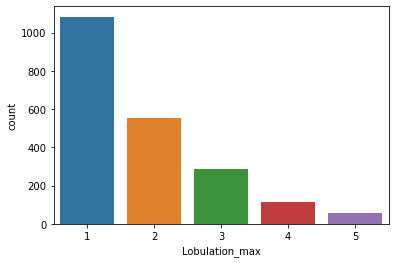

In [72]:
print(sns.countplot(x='Lobulation_max',data=df[df["Malignancy"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


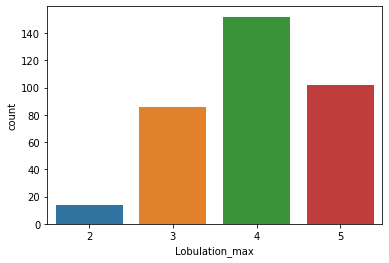

In [73]:
print(sns.countplot(x='Lobulation_max',data=df[df["Prediction_rf"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


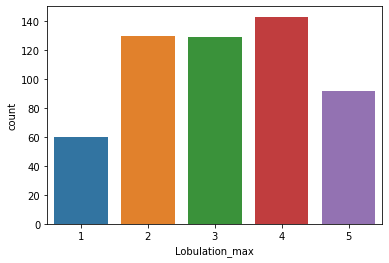

In [74]:
print(sns.countplot(x='Lobulation_max',data=df[df["Malignancy"]==True]))

In [75]:
# To simplify the model, we calculated the correlation between all the Lobulation variables 
# Since the correlation betweem the mean value and the other two is high we will keep only this

df[['Lobulation_min', 'Lobulation_mean','Lobulation_max']].corr()

,Lobulation_min,Lobulation_mean,Lobulation_max
Lobulation_min,1.000000,0.795013,0.508459
Lobulation_mean,0.795013,1.000000,0.896387
Lobulation_max,0.508459,0.896387,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)


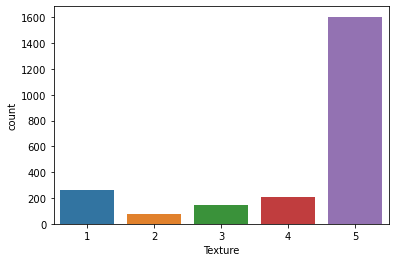

In [76]:
# Regarding Texture the distributions obtained for the predictions and the real value of malignancy 
# are similar but it seams that it might not be interesting to be considered in the classification process

print(sns.countplot(x='Texture',data=df[df["Prediction_rf"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


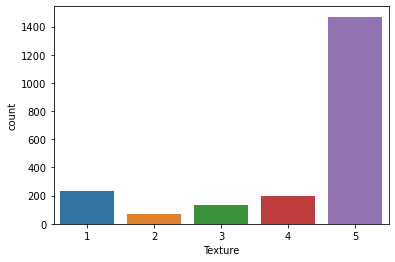

In [77]:
print(sns.countplot(x='Texture',data=df[df["Malignancy"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


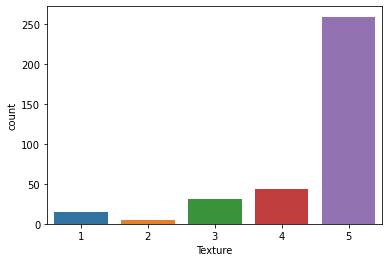

In [78]:
print(sns.countplot(x='Texture',data=df[df["Prediction_rf"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


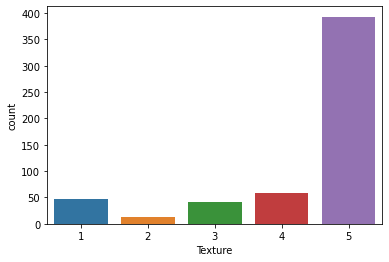

In [79]:
print(sns.countplot(x='Texture',data=df[df["Malignancy"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


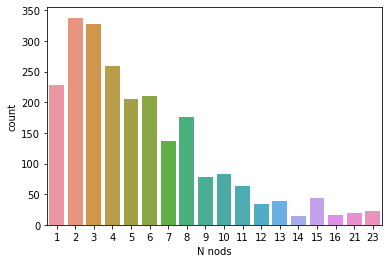

In [80]:
# Regarding N nods the distributions obtained for the predictions and the real value of malignancy 
# are similar but it seams that it might not be interesting to be considered in the classification process

print(sns.countplot(x='N nods',data=df[df["Prediction_rf"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


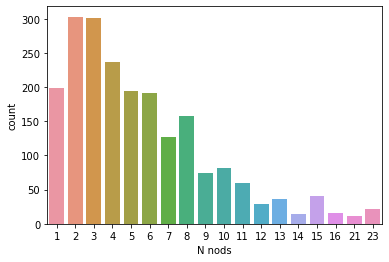

In [81]:
print(sns.countplot(x='N nods',data=df[df["Malignancy"]==False]))

AxesSubplot(0.125,0.125;0.775x0.755)


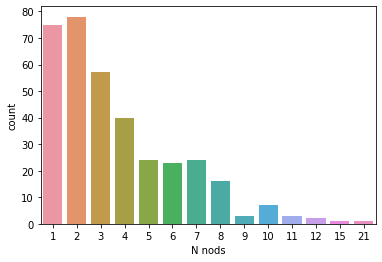

In [82]:
print(sns.countplot(x='N nods',data=df[df["Prediction_rf"]==True]))

AxesSubplot(0.125,0.125;0.775x0.755)


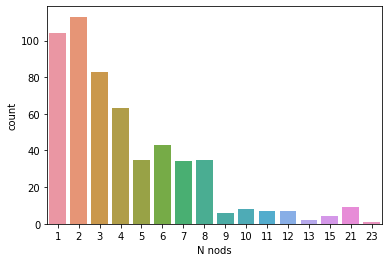

In [83]:
print(sns.countplot(x='N nods',data=df[df["Malignancy"]==True]))

In [84]:
# To cunstruct the same models but using only the features that we considered interesting we created 
# a CSV file to be explored in a diferente notebook (prediction_clean.ipynb)

df[{'Spiculation_Max','Calcification','Margin_min','Lobulation_mean','Malignancy'}].to_csv("clean.csv")

In [85]:
# Since the prediction given from the different models are different in some situations 
# we decided to combine the predictions of all three

df[{'Prediction_dt','Prediction_rf','Prediction_knn','Malignancy'}].head(10)

,Prediction_dt,Prediction_rf,Malignancy,Prediction_knn
0,True,True,True,True
1,True,True,True,True
2,False,False,False,False
3,True,True,True,True
4,True,True,True,True
5,False,False,False,False
6,False,True,True,True
7,False,True,False,False
8,False,False,False,False
9,False,False,False,True


In [86]:
# The following corss tables show the differences between the models predictions and its relations to the real value 
pd.crosstab(df['Malignancy'], df['Prediction_dt'], rownames=['Malignancy'], colnames=['Prediction_dt'])

Prediction_dt,False,True
Malignancy,,
False,2029,68
True,324,230


In [87]:
pd.crosstab(df['Malignancy'], df['Prediction_rf'], rownames=['Malignancy'], colnames=['Prediction_rf'])

Prediction_rf,False,True
Malignancy,,
False,2041,56
True,256,298


In [88]:
pd.crosstab(df['Malignancy'], df['Prediction_knn'], rownames=['Malignancy'], colnames=['Prediction_knn'])

Prediction_knn,False,True
Malignancy,,
False,2048,49
True,309,245


In [89]:
pd.crosstab(df['Prediction_dt'], df['Prediction_rf'], rownames=['Prediction_dt'], colnames=['Prediction_rf'])

Prediction_rf,False,True
Prediction_dt,,
False,2246,107
True,51,247


In [90]:
pd.crosstab(df['Prediction_dt'], df['Prediction_knn'], rownames=['Prediction_dt'], colnames=['Prediction_knn'])

Prediction_knn,False,True
Prediction_dt,,
False,2274,79
True,83,215


In [91]:
pd.crosstab(df['Prediction_knn'], df['Prediction_rf'], rownames=['Prediction_knn'], colnames=['Prediction_rf'])

Prediction_rf,False,True
Prediction_knn,,
False,2262,95
True,35,259


In [92]:
# To explore this idea we constructed a new csv file to be explored in a 
# different notebook (Combined_prediction.ipynb) 

df[{'Prediction_dt','Prediction_rf','Prediction_knn','Malignancy'}].to_csv("predictions.csv")